In [1]:
import sys
from pathlib import Path

project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

from src.preprocessing import prepare_features

In [3]:
df = pd.read_csv("../data/raw/retail_customers_COMPLETE_CATEGORICAL.csv")
df = prepare_features(df, impute=False)

In [4]:
df.keys()

Index(['Recency', 'Frequency', 'MonetaryTotal', 'MonetaryAvg', 'MonetaryStd',
       'MonetaryMin', 'MonetaryMax', 'TotalQuantity',
       'AvgQuantityPerTransaction', 'MinQuantity', 'MaxQuantity',
       'CustomerTenureDays', 'FirstPurchaseDaysAgo', 'PreferredDayOfWeek',
       'PreferredHour', 'PreferredMonth', 'WeekendPurchaseRatio',
       'AvgDaysBetweenPurchases', 'UniqueProducts', 'UniqueDescriptions',
       'AvgProductsPerTransaction', 'UniqueCountries', 'NegativeQuantityCount',
       'ZeroPriceCount', 'CancelledTransactions', 'ReturnRatio',
       'TotalTransactions', 'UniqueInvoices', 'AvgLinesPerInvoice', 'Age',
       'SupportTicketsCount', 'SatisfactionScore', 'RFMSegment', 'AgeCategory',
       'SpendingCategory', 'PreferredTimeOfDay', 'LoyaltyLevel',
       'ChurnRiskCategory', 'BasketSizeCategory', 'Country', 'Churn',
       'CustomerType_Nouveau', 'CustomerType_Occasionnel',
       'CustomerType_Perdu', 'CustomerType_Régulier', 'FavoriteSeason_Hiver',
       'Favorit

In [5]:
df["RFMSegment"].unique()

array([3, 4, 2, 1])

In [6]:
df.head()

,Recency,Frequency,MonetaryTotal,MonetaryAvg,MonetaryStd,MonetaryMin,MonetaryMax,TotalQuantity,AvgQuantityPerTransaction,MinQuantity,...,Gender_Unknown,AccountStatus_Closed,AccountStatus_Pending,AccountStatus_Suspended,GeoIP,RegistrationYear,RegistrationMonth,RegistrationDay,RegistrationDayOfWeek,DaysSinceRegistration
0,302,35,5288.63,16.950737,13.603662,-30.60,107.25,1693,5.426282,-12,...,True,False,False,False,0.268156,2010,7,17,5,531
1,32,18,3079.10,15.709694,11.684769,-15.00,68.00,1355,6.913265,-3,...,False,False,False,False,0.332990,2010,10,4,0,452
2,3,18,7187.34,28.634821,23.150132,-60.84,132.80,5009,19.956175,-36,...,True,False,False,False,0.339921,2009,9,12,5,839
3,96,5,948.25,33.866071,42.953119,9.36,204.00,439,15.678571,1,...,True,False,False,False,0.303681,2010,1,28,3,701
4,330,6,635.10,105.850000,215.986263,-131.40,350.40,58,9.666667,-12,...,False,False,False,False,0.415459,2009,12,10,3,750


In [7]:
df["Age"].head()

0     NaN
1     NaN
2    46.0
3    32.0
4     NaN
Name: Age, dtype: float64

In [8]:
def plot_age_distribution(df):
    df["Age"].plot(kind='hist', bins=20, edgecolor='black')
    plt.axvline(df["Age"].mean(), color='red', linestyle='--', label=f'Mean: {df["Age"].mean():.2f}')
    plt.axvline(df["Age"].median(), color='green', linestyle='--', label=f'Median: {df["Age"].median():.2f}')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title('Distribution of Age')
    plt.legend()
    plt.show()


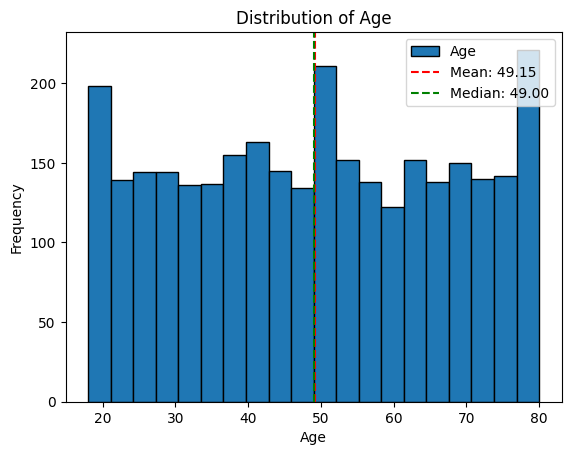

Mean Age: 49.15
Median Age: 49.00


In [9]:
plot_age_distribution(df)

print(f"Mean Age: {df['Age'].mean():.2f}")
print(f"Median Age: {df['Age'].median():.2f}")

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['AvgDaysBetweenPurchases'] = df['AvgDaysBetweenPurchases'].fillna(df['AvgDaysBetweenPurchases'].median())

print(f"Missing values after imputation:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Missing values after imputation:
SatisfactionScore     349
AgeCategory          1311
dtype: int64


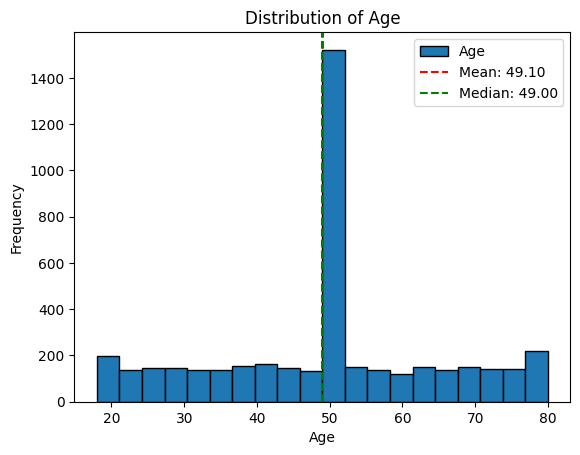

In [11]:
plot_age_distribution(df)

# They're equiprobably, 30% are missing so 30% are send to the median which skews the distribution heavily towards it.
# This cannot be right.

Given that that entirely skews the data. I'll look into the k means approach

In [12]:
df = prepare_features(
    pd.read_csv("../data/raw/retail_customers_COMPLETE_CATEGORICAL.csv")
)

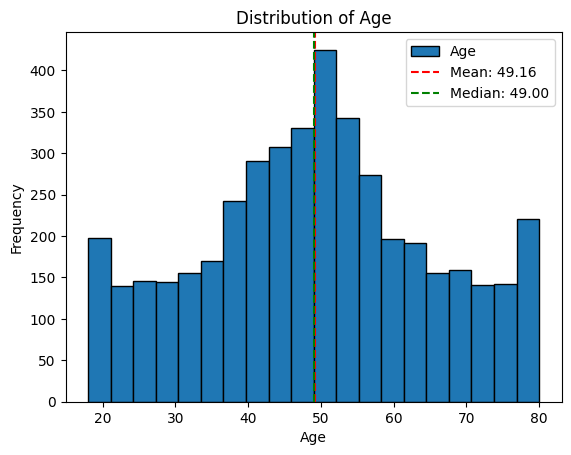

In [13]:
from src.utils import impute_missing_knn


df = impute_missing_knn(df, target_columns=["Age"], n_neighbors=6)

plot_age_distribution(df)